# Homework 3 - Ames Housing Dataset

For all parts below, answer all parts as shown in the Google document for Homework 3. Be sure to include both code that justifies your answer as well as text to answer the questions. We also ask that code be commented to make it easier to follow.

In [0]:
# TODO: code and runtime results
from google.colab import drive
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
sns.set()

In [2]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
cd '/content/drive/My Drive/DSF/Homework_3/house-prices-advanced-regression-techniques'

/content/drive/My Drive/DSF/Homework_3/house-prices-advanced-regression-techniques


## Part 1 - Pairwise Correlations

In [0]:
# TODO: show visualization
df_train=pd.read_csv('train.csv')

In [0]:
df_train_clean=df_train.copy()

In [0]:
isna=df_train_clean.isna().sum()

In [0]:
df_train_clean.drop(['MiscFeature','PoolQC','Fence','Alley'], axis=1, inplace=True)

In [8]:
df_train_clean[df_train_clean.columns[df_train_clean.dtypes=='object']]=df_train_clean[df_train_clean.columns[df_train_clean.dtypes=='object']].fillna(df_train_clean.mode().iloc[0])
df_train_clean[df_train_clean.columns[df_train_clean.dtypes=='int64']]=df_train_clean[df_train_clean.columns[df_train_clean.dtypes=='int64']].fillna(df_train_clean.mean())
df_train_clean[df_train_clean.columns[df_train_clean.dtypes=='float64']]=df_train_clean[df_train_clean.columns[df_train_clean.dtypes=='float64']].fillna(df_train_clean.mean())
df_train_clean.shape

(1460, 77)

In [0]:
df_train_P1=df_train_clean.copy()

In [0]:
df_train_P1=df_train_P1[['MSSubClass',
 'MSZoning',
 'LotArea',
 'PoolArea',
 'GrLivArea',
 'BsmtFinSF1',
 'GarageArea',
 'TotalBsmtSF',
 'TotRmsAbvGrd',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd', 
 'GarageYrBlt',
 'SalePrice']]

In [0]:
cat_cols = df_train_P1.dtypes==object
cat_cols = df_train_P1.columns[cat_cols].tolist()

le = preprocessing.LabelEncoder()
df_train_P1[cat_cols] = df_train_P1[cat_cols].apply(lambda col: le.fit_transform(col.astype(str)))

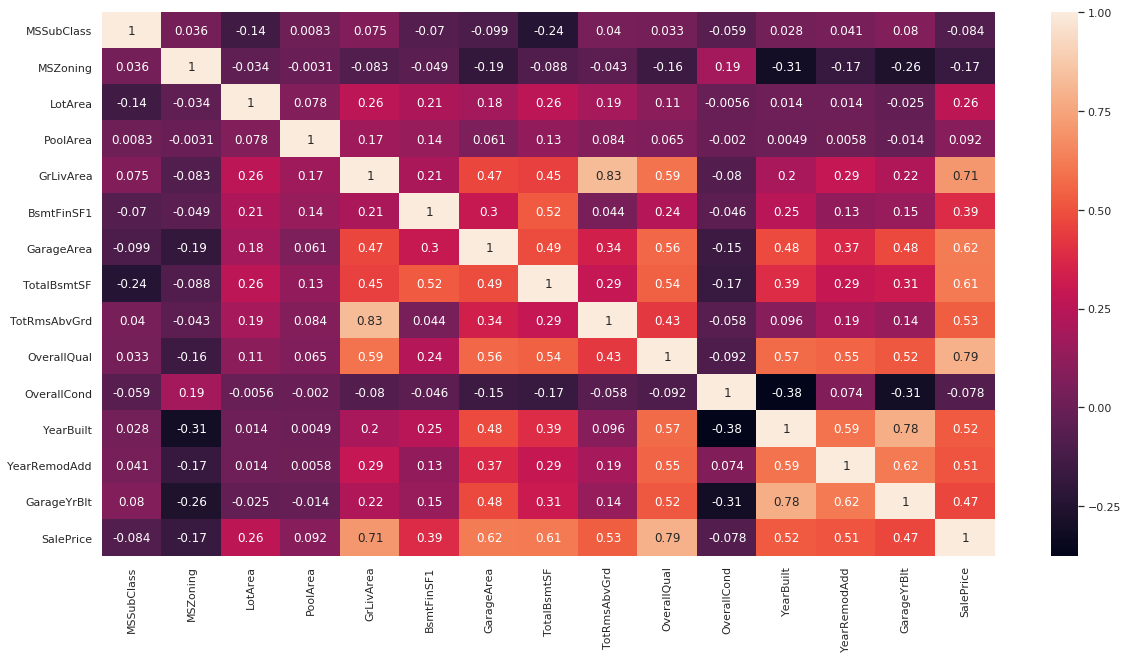

In [12]:
corr_pearson = df_train_P1.corr()

plt.figure(figsize=[20,10])
ax = sns.heatmap(corr_pearson,annot=True)

In [0]:
del [[df_train_P1,corr_pearson]]

Discuss most positive and negative correlations.



The features have been decided by analysing the data_description.txt file and the training dataset.

**Highest Positive Correlation = 0.83** (GrLivArea and TotRmsAbvGrd)

This signifies that more the ground living area, more the number of rooms.

**Least Negative Correlation = -0.38** (OverallCond and YearBuilt)

This signifies that the OverallCond will mostly be opposite to the year the house was built in. Therefore, hihger the overall condition, earlier the house was built.

## Part 2 - Informative Plots

Text(0.5, 1.0, 'SalePrice Distribution')

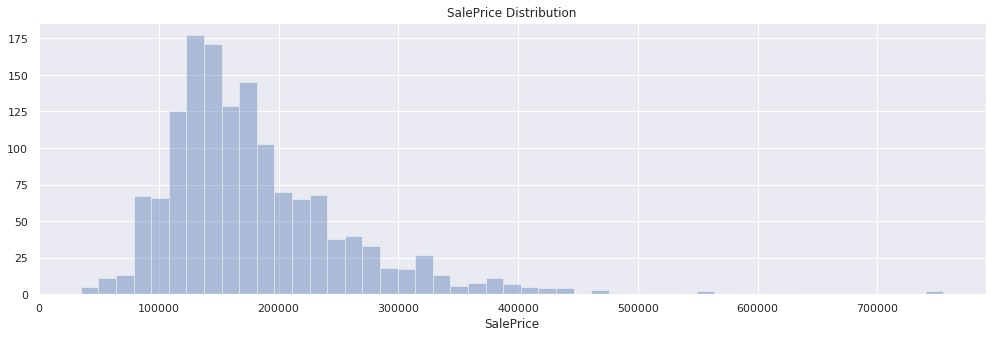

In [14]:
# TODO: code to generate Plot 1
df_train_P2=df_train.copy()

plt.figure(figsize=(17,5))
sns.distplot(df_train_P2['SalePrice'],kde=False).set_title('SalePrice Distribution')

What interesting properties does Plot 1 reveal?

It can observed that the data is skewed.

We can see that most number of houses cost in the  range of 120000 and 180000 (approximately).
Moreover, there are significantly lower number of houses which are ultra expensive, even compared to the ultra cheap houses.

Text(0.5, 1.0, 'GrLivArea vs SalePrice vs TotRmsAbvGrd')

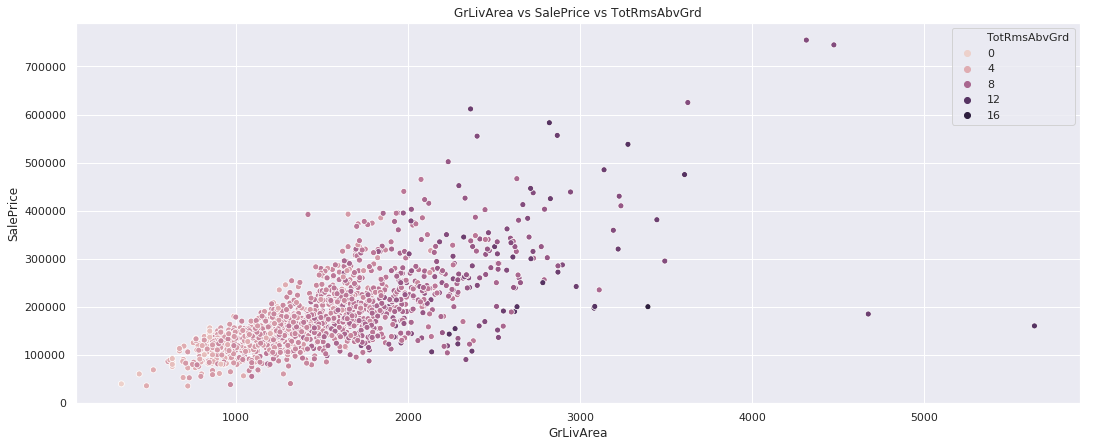

In [15]:
# TODO: code to generate Plot 2
plt.figure(figsize=(18,7))
sns.scatterplot(x="GrLivArea", y="SalePrice",hue='TotRmsAbvGrd',data=df_train_P2).set_title('GrLivArea vs SalePrice vs TotRmsAbvGrd')

What interesting properties does Plot 2 reveal?


As the Ground Living Area increases, the Sale Price also increases. This is a linear relationship.

The Total number of rooms increases, in effect the Ground Living Area also increases. The more the area, the more the number of rooms.

Text(0.5, 1.0, 'Neighborhood vs SalePrice')

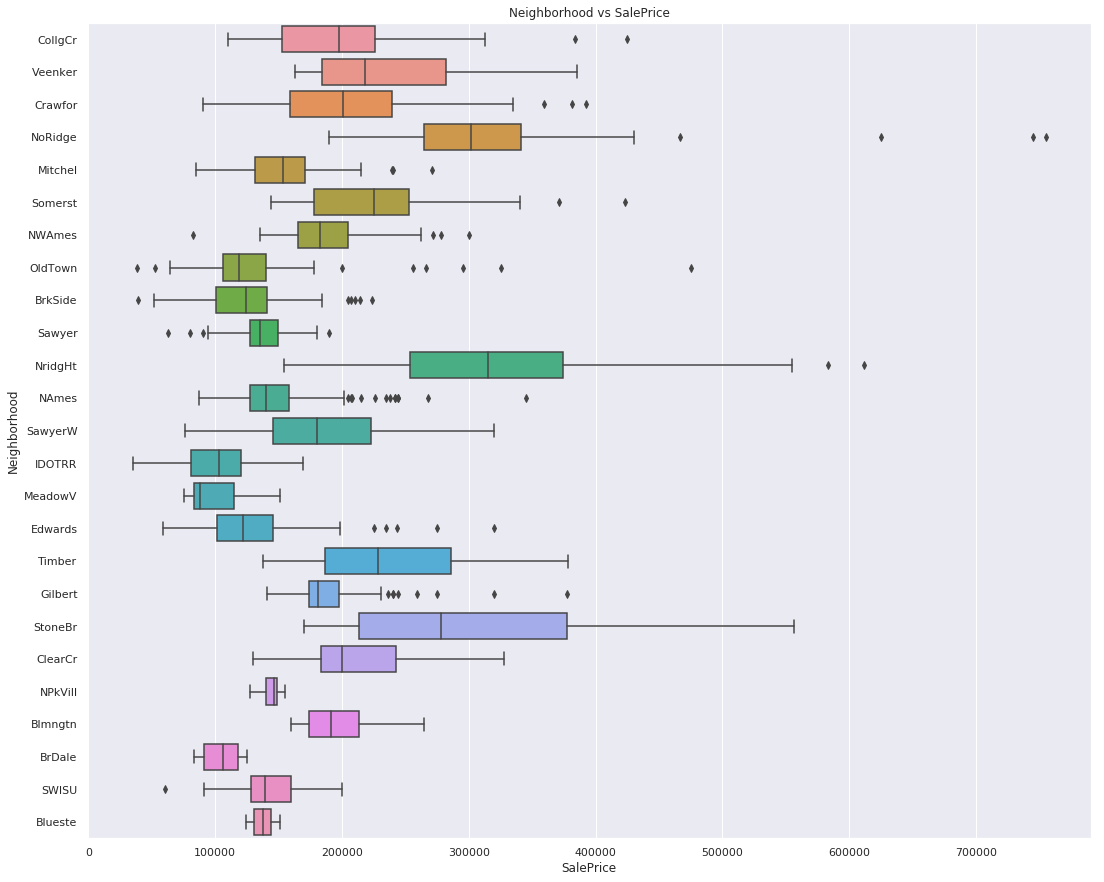

In [16]:
# TODO: code to generate Plot 3

plt.figure(figsize=(18,15))
# sns.countplot(x="Neighborhood", y="SalePrice",data=df_train_P2).set_title('GrLivArea vs SalePrice')
sns.boxplot(x="SalePrice", y="Neighborhood",data=df_train_P2).set_title('Neighborhood vs SalePrice')

What interesting properties does Plot 3 reveal?

We can infer that the different neighborhoods have different range of SalePrice.
The neighborhoods with the most expensive houses are 'NirdigHt' and 'StoneBr'. 

Also, the maximum range of SalePrice is for 'StoneBr'.

Text(0.5, 1.0, 'OverallQual vs SalePrice')

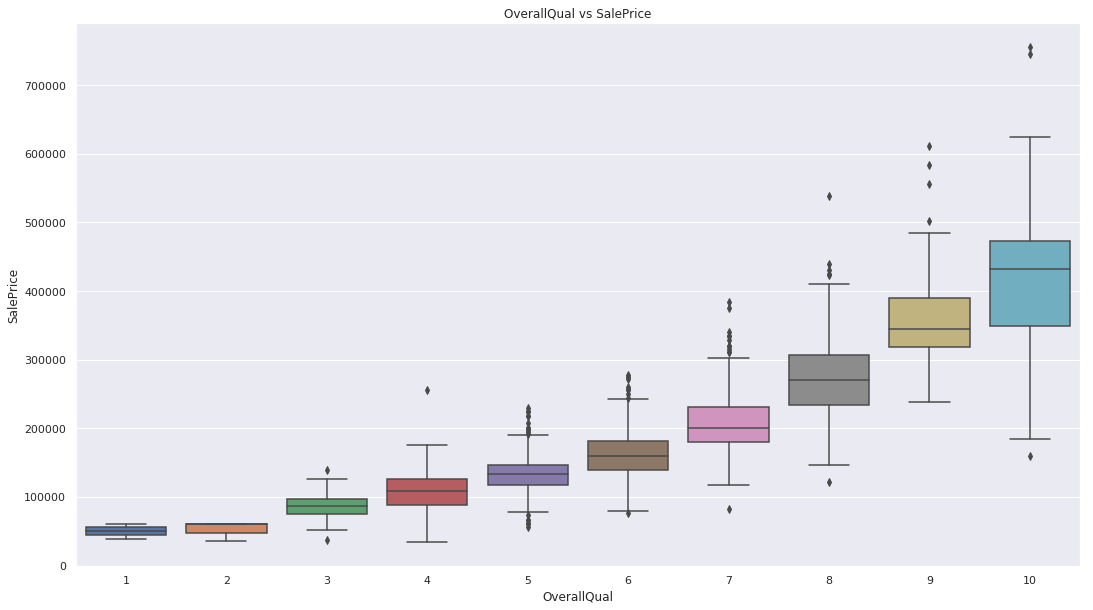

In [17]:
# # TODO: code to generate Plot 4
# OverallQual
plt.figure(figsize=(18,10))
sns.boxplot(y="SalePrice", x="OverallQual",data=df_train_P2).set_title('OverallQual vs SalePrice')

What interesting properties does Plot 4 reveal?

We can infer that as the Overall Quality of the houses increases, the cost of the houses increases. 

It can also be observed with this increase, even the range of SalePrice increases with the increase in Overall Quality.

Text(0.5, 1.0, 'SalePrice vs YearBuilt vs BldgType')

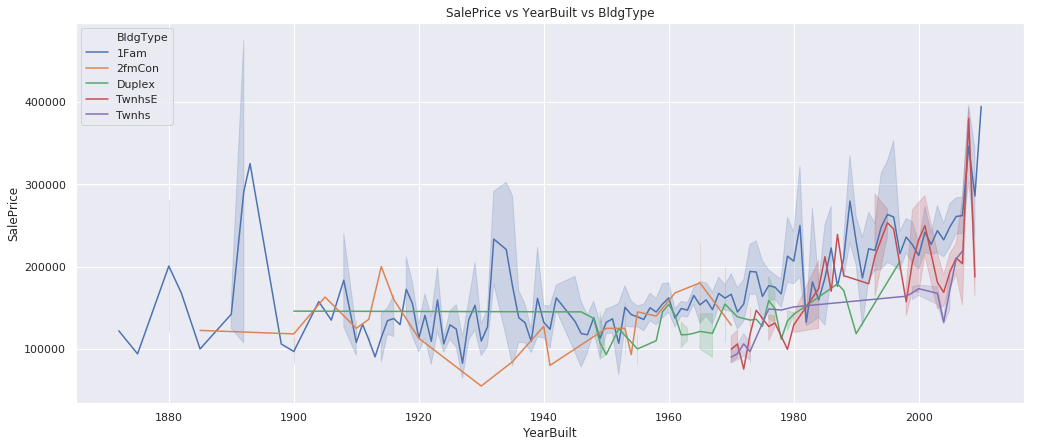

In [18]:
# TODO: code to generate Plot 5
plt.figure(figsize=(17,7))
sns.lineplot(y='SalePrice', x='YearBuilt',markers=True, dashes=False,data=df_train_P2,hue='BldgType').set_title('SalePrice vs YearBuilt vs BldgType')

What interesting properties does Plot 5 reveal?

1. Initially 'Single-family Detached' were the type of houses that existed and were sold until the year 1885.
2. After 1880 'Two-family Conversion' were the kind of houses that were sold. Although, Single-family houses still dominated the market.
3. 'Duplex' houses started being sold after the year 1900. It was sold at a constant rate for a few years. But after the year 1950, it's frequency dropped.
4. 'Townhouse End Unit' and 'Townhouse Inside Unit' houses, both these type of houses started being sold after 1970. In the years around 2000, the Single family and Townhouse End Unit have similar frequency of sale.

In [0]:
del [df_train_P2]

## Part 3 - Handcrafted Scoring Function

In [0]:
# TODO: code for scoring function
df_train_P3=df_train_clean.copy()

cat_cols = df_train_P3.dtypes==object
cat_cols = df_train_P3.columns[cat_cols].tolist()

le = preprocessing.LabelEncoder()
df_train_P3[cat_cols] = df_train_P3[cat_cols].apply(lambda col: le.fit_transform(col.astype(str)))

corr_pearson = df_train_P3.corr()

In [0]:
df_train_P3_pos_corr_SalePrice=corr_pearson['SalePrice'].copy()
    
df_train_P3=df_train_P3[df_train_P3_pos_corr_SalePrice.index]
df_train_P3_pos_corr_SalePrice.drop(labels = ['Id'],inplace=True)
df_train_P3_pos_corr_SalePrice.drop(labels = ['SalePrice'],inplace=True)

In [0]:
sum_P3=df_train_P3_pos_corr_SalePrice.values.sum()

for index,val in df_train_P3_pos_corr_SalePrice.iteritems():
    df_train_P3_pos_corr_SalePrice[index]=val/sum_P3

ID=df_train_P3['Id']
SalePrice=df_train_P3['SalePrice']
df_train_P3.drop(['Id','SalePrice'], axis=1, inplace=True)

df_train_P3['Score'] = df_train_P3.dot(df_train_P3_pos_corr_SalePrice)
df_train_P3['Id']=ID
df_train_P3['SalePrice']=SalePrice

In [23]:
df_train_P3.set_index('Id', inplace=True)
print("Top 10 Desirable Houses: \n")
print(df_train_P3.nlargest(10,'Score'))
print("\n\n\nTop 10 Least Houses: \n")
print(df_train_P3.nsmallest(10,'Score'))

Top 10 Desirable Houses: 

      MSSubClass  MSZoning  LotFrontage  ...  SaleCondition        Score  SalePrice
Id                                       ...                                       
314           20         3   150.000000  ...              4  7153.467444     375000
336          190         3    70.049958  ...              4  5610.096576     228950
250           50         3    70.049958  ...              4  5465.431619     277000
707           20         3    70.049958  ...              4  4218.995842     302000
1299          60         3   313.000000  ...              5  3832.971051     160000
452           20         3    62.000000  ...              4  2820.391025     280000
770           60         3    47.000000  ...              4  2613.168367     538000
524           60         3   130.000000  ...              5  2593.580812     184750
54            20         3    68.000000  ...              4  2365.389059     385000
385           60         3    70.049958  ...     

In [0]:
del [[df_train_P3,df_train_P3_pos_corr_SalePrice,ID,corr_pearson]]

What is the ten most desirable houses?

The ten most desirable houses are with the Id: 
1.   **314**
2.   **336**
2.   **250**
2.   **707**
2.   **1299**
2.   **452**
2.   **770**
2.   **524**
2.   **54**
2.   **385**

What is the ten least desirable houses?

The ten least desirable houses are with the Id: 
1.   **615**
2.   **534**
2.   **650**
2.   **1450**
2.   **435**
2.   **1040**
2.   **490**
2.   **711**
2.   **838**
2.   **76**

Describe your scoring function and how well you think it worked.

The scoring function is based on the correaltion of the features with the target feature, i.e SalePrice.
The features have been given weights based on their correlation value.
The correlation values have been normlaized such that the summation of their weights will be 1.

The intuition behind the scoring function was that the more desirable houses will have higher cost.
This is evident if we check the trend for different features, for example MSSubclass, 20 and 60 subclass give more desirability to the house.

## Part 4 - Pairwise Distance Function

In [0]:
# TODO: code for distance function
from scipy.spatial import distance

df_train_P4=df_train_clean.copy()

cat_cols = df_train_P4.dtypes==object
cat_cols = df_train_P4.columns[cat_cols].tolist()

le = preprocessing.LabelEncoder()
df_train_P4[cat_cols] = df_train_P4[cat_cols].apply(lambda col: le.fit_transform(col.astype(str)))


In [26]:
len_df_P4=len(df_train_P4.index)
SalePrice_dist = np.zeros(shape=(len_df_P4,len_df_P4))

for i in range(len_df_P4):
  for j in range (len_df_P4):
    dist = df_train_P4['SalePrice'].values[i]-df_train_P4['SalePrice'].values[j]
    SalePrice_dist[i][j]=abs(dist)
    
df_train_P4_dist = df_train_P4.drop("SalePrice", axis=1)
pdf = distance.cdist(df_train_P4_dist, df_train_P4_dist, lambda x, y: np.sqrt(sum((x-y)**3)))


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in sqrt
  # Remove the CWD from sys.path while we load stuff.


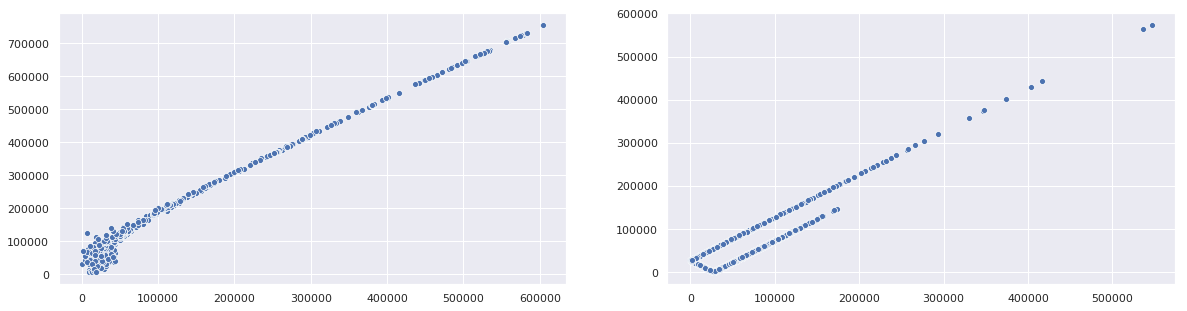

In [27]:
fig, ax =plt.subplots(1,2,figsize=(20,5),sharex=False)

sns.scatterplot(x=pdf[0], y=pdf[1],ax=ax[0])
sns.scatterplot(x=SalePrice_dist[0], y=SalePrice_dist[1],ax=ax[1])

In [0]:
del [[df_train_P4,df_train_P4_dist]]

How well does the distance function work? When does it do well/badly?

'pdf' is pairwise distance function.
The distance matrix 'pdf' is the square root of the cube of differences between tuples. The values returned by pds is very quite close to the difference of SalePrice for these tuples. The graph of pds is similar to the sale price difference matrix graph.
Therefore, the distance function pdf works well.

## Part 5 - Clustering

In [0]:
# TODO: code for clustering and visualization
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE


df_train_P5=df_train_clean.copy()

cat_cols = df_train_P5.dtypes==object
cat_cols = df_train_P5.columns[cat_cols].tolist()

le = preprocessing.LabelEncoder()
df_train_P5[cat_cols] = df_train_P5[cat_cols].apply(lambda col: le.fit_transform(col.astype(str)))

In [0]:
df_train_P5_numpy = df_train_P5.values
min_max_scaler = preprocessing.MinMaxScaler()
df_train_P5_numpy_scaled = min_max_scaler.fit_transform(df_train_P5_numpy)
df_train_P5_numpy_scaled = pd.DataFrame(df_train_P5_numpy_scaled)

kmeans = KMeans(n_clusters=12)
kmeans.fit(df_train_P5_numpy_scaled)
y_kmeans = kmeans.predict(df_train_P5_numpy_scaled)
df_train_P5_embedded = TSNE(n_components=2).fit_transform(df_train_P5_numpy_scaled)

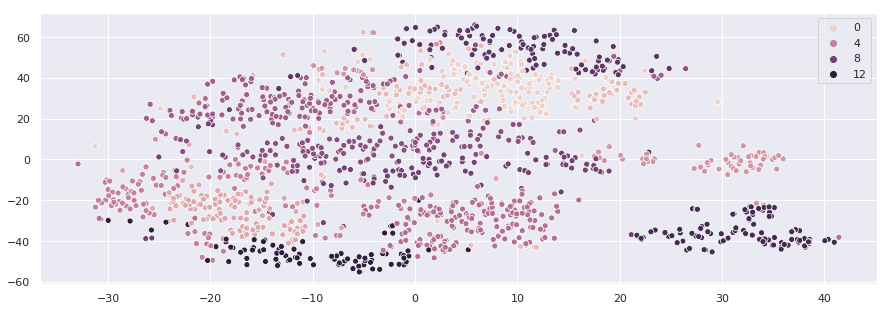

In [31]:
plt.figure(figsize=(15, 5))
sns.scatterplot(x=df_train_P5_embedded[:, 0], y=df_train_P5_embedded[:, 1], hue=y_kmeans)

In [0]:
del [[df_train_P5,df_train_P5_numpy_scaled,df_train_P5_embedded,df_train_P5_numpy]]

How well do the clusters reflect neighborhood boundaries? Write a discussion on what your clusters capture and how well they work.

The above figure shows the clustering of the data values based on a distance metric. K means clustering algorithm clusters the data into K number of clusters.
For this case, k is 12 as seen in the above figure.
Distance metric used by the algorithm is euclidean distance. Data belonging to clusters are evidently seperated from other clusters.

## Part 6 - Linear Regression

In [0]:
# TODO: code for linear regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

df_train_P6=df_train_clean.copy()

cat_cols = df_train_P6.dtypes==object
cat_cols = df_train_P6.columns[cat_cols].tolist()

le = preprocessing.LabelEncoder()
df_train_P6[cat_cols] = df_train_P6[cat_cols].apply(lambda col: le.fit_transform(col.astype(str)))

train, test = train_test_split(df_train_P6,train_size=0.9)
Y_train = train['SalePrice']
Y_test = test['SalePrice']

In [34]:
X_train = train[['OverallQual']]
X_test = test[['OverallQual']]

model = LinearRegression().fit(X_train, Y_train)
Y_pred = model.predict(X_test)

score = model.score(X_train, Y_train)
print('Score:', score)
rms = np.sqrt(mean_squared_error(np.log(Y_test), np.log(Y_pred)))
print('RMSE:', rms)

Score: 0.6311497446095071
RMSE: 0.2734483899139265


In [35]:
X_train = train[['GrLivArea']]
X_test = test[['GrLivArea']]

model = LinearRegression().fit(X_train, Y_train)
Y_pred = model.predict(X_test)

score = model.score(X_train, Y_train)
print('Score:', score)
rms = np.sqrt(mean_squared_error(np.log(Y_test), np.log(Y_pred)))
print('RMSE:', rms)

Score: 0.5302720481602266
RMSE: 0.28914610273793423


In [36]:
X_train = train[['GarageArea']]
X_test = test[['GarageArea']]

model = LinearRegression().fit(X_train, Y_train)
Y_pred = model.predict(X_test)

score = model.score(X_train, Y_train)
print('Score:', score)
rms = np.sqrt(mean_squared_error(np.log(Y_test), np.log(Y_pred)))
print('RMSE:', rms)

Score: 0.3918833171674463
RMSE: 0.30724191331455497


In [37]:
X_train = train[['TotalBsmtSF']]
X_test = test[['TotalBsmtSF']]

model = LinearRegression().fit(X_train, Y_train)
Y_pred = model.predict(X_test)

score = model.score(X_train, Y_train)
print('Score:', score)
rms = np.sqrt(mean_squared_error(np.log(Y_test), np.log(Y_pred)))
print('RMSE:', rms)

Score: 0.415074487551893
RMSE: 0.3215171082696571


In [38]:
X_train=train[['MSSubClass',
 'MSZoning',
 'LotArea',
 'PoolArea',
 'GrLivArea',
 'BsmtFinSF1',
 'GarageArea',
 'TotalBsmtSF',
 'TotRmsAbvGrd',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd', 
 'GarageYrBlt']]

X_test=test[['MSSubClass',
 'MSZoning',
 'LotArea',
 'PoolArea',
 'GrLivArea',
 'BsmtFinSF1',
 'GarageArea',
 'TotalBsmtSF',
 'TotRmsAbvGrd',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd', 
 'GarageYrBlt']]


model = LinearRegression().fit(X_train, Y_train)
Y_pred = model.predict(X_test)

score = model.score(X_train, Y_train)
print('Score:', score)
rms = np.sqrt(mean_squared_error(np.log(Y_test), np.log(Y_pred)))
print('RMSE:', rms)

Score: 0.8279703865918338
RMSE: 0.19112994456471255


In [0]:
del [df_train_P6]

How well/badly does it work? Which are the most important variables?

Top 4 features have been considered from Part 1.

By performing linear regression, we observed the following:

**OverallQual:** 

Score: 0.6265082886069024

RMSE: 0.3007400199641814

**GrLivArea:**

Score: 0.49773266615921447

RMSE: 0.27367496499224914

**GarageArea:** 

Score: 0.3888393328909978

RMSE: 0.3296042039134672


**TotalBsmtSF:** 

Score: 0.3703938829550786

RMSE: 0.30523419334378066


**Group of Features:** 


Apart from the indvidual features, the 14 features from Part 1 have been used and performed liner regression on, it resulted in:

Score: 0.7861095260374218

RMSE: 0.1788936967919409

From these features we can see that **Group of Features** is the best set of features with highest score and lowest Root Mean Squared Error compared to indvidual features.

## Part 7 - External Dataset

In [0]:
# TODO: code to import external dataset and test
from lightgbm import LGBMRegressor

df_train_P7=df_train.copy()

df_external=pd.read_excel('externalDataSet.xls')

df_test=pd.read_csv('test.csv')
df_test_external=df_test.copy()

df_external.rename(columns={"Order": "Id"}, inplace = True)
df_train_P7 = pd.merge(df_external[['Id','PID']], df_train_P7, on='Id', how='right')
df_test_external = pd.merge(df_external[['Id','PID']], df_test_external, on='Id', how='right')

In [0]:
df_train_P7.columns = df_train_P7.columns.str.replace(' ', '')

In [0]:
df_external.drop(['Id'], axis=1, inplace=True)

Test_T_ID_external=df_test_external['Id']

df_test_external.drop(['Id','MiscFeature','PoolQC','Fence','Alley'], axis=1, inplace=True)
df_test_external[df_test_external.columns[df_test_external.dtypes=='object']]=df_test_external[df_test_external.columns[df_test_external.dtypes=='object']].fillna(df_test_external.mode().iloc[0])
df_test_external[df_test_external.columns[df_test_external.dtypes=='int64']]=df_test_external[df_test_external.columns[df_test_external.dtypes=='int64']].fillna(df_test_external.mean())
df_test_external[df_test_external.columns[df_test_external.dtypes=='float64']]=df_test_external[df_test_external.columns[df_test_external.dtypes=='float64']].fillna(df_test_external.mean())

df_train_P7.drop(['Id','MiscFeature','PoolQC','Fence','Alley'], axis=1, inplace=True)
df_train_P7[df_train_P7.columns[df_train_P7.dtypes=='object']]=df_train_P7[df_train_P7.columns[df_train_P7.dtypes=='object']].fillna(df_train_P7.mode().iloc[0])
df_train_P7[df_train_P7.columns[df_train_P7.dtypes=='int64']]=df_train_P7[df_train_P7.columns[df_train_P7.dtypes=='int64']].fillna(df_train_P7.mean())
df_train_P7[df_train_P7.columns[df_train_P7.dtypes=='float64']]=df_train_P7[df_train_P7.columns[df_train_P7.dtypes=='float64']].fillna(df_train_P7.mean())

In [0]:
X = df_train_P7[[col for col in df_train_P7.columns if col != 'SalePrice']]
Y = df_train_P7['SalePrice']

In [0]:
cat_cols = X.dtypes==object
cat_cols = X.columns[cat_cols].tolist()

le = preprocessing.LabelEncoder()
X[cat_cols] = X[cat_cols].apply(lambda col: le.fit_transform(col.astype(str)))

cat_cols = df_test_external.dtypes==object
cat_cols = df_test_external.columns[cat_cols].tolist()

le = preprocessing.LabelEncoder()
df_test_external[cat_cols] = df_test_external[cat_cols].apply(lambda col: le.fit_transform(col.astype(str)))

In [0]:
gbm=LGBMRegressor(objective='regression',learning_rate=0.05, n_estimators=300)
# train
gbm.fit(X,Y)

print('Accuracy of gbm regression on training set: {:.2f}'
     .format(gbm.score(X, Y)))
Y_pred_gbm=gbm.predict(df_test_external)

gbmResult = {'Id':Test_T_ID_external, 'SalePrice':Y_pred_gbm}
df_gbmResult = pd.DataFrame(gbmResult)
df_gbmResult.head()  
df_gbmResult.shape

df_gbmResult.to_csv('submissionLgbm_external.csv',index=False)

Describe the dataset and whether this data helps with prediction.

The dataset is an extension of the Ames Housing dataset which was compiled by Dean De Cock. Refernce: http://jse.amstat.org/v19n3/decock.pdf

Source: http://www.amstat.org/publications/jse/v19n3/decock/AmesHousing.xls

This dataset has an extra column, 'PID' which is the Parcel Identification Number assigned to each property within the Ames Assessor’s system.



The dataset was trained with the best model from Part 9.
The external dataset does not improve the prediction, this can be seen by the drop in the Kaggle Score.

External dataset Kaggle Score: 0.13383

In [0]:
del [[df_external,df_gbmResult,df_test_external,df_train_P7]]

## Part 8 - Permutation Test

In [47]:
# TODO: code for all permutation tests
from mlxtend.evaluate import permutation_test

df_train_P8=df_train_clean.copy()

cat_cols = df_train_P8.dtypes==object
cat_cols = df_train_P8.columns[cat_cols].tolist()

le = preprocessing.LabelEncoder()
df_train_P8[cat_cols] = df_train_P8[cat_cols].apply(lambda col: le.fit_transform(col.astype(str)))

X = df_train_P8[[col for col in df_train_P8.columns if col != 'SalePrice']]
Y = df_train_P8['SalePrice']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Choose 10 variables few are good and few are bad
cols = [ 'GrLivArea','Utilities','MoSold','TotalBsmtSF', 'TotRmsAbvGrd','SaleCondition','MSSubClass','MSZoning', 'LotArea','PoolArea','OverallCond']

print("P-Test:\n")
for c in cols:
  regr = LinearRegression()
  regr.fit(np.reshape(X_train[c].values, (-1, 1)), np.reshape(Y_train.values, (-1, 1)))
  Y_pred = regr.predict(np.reshape(X_test[c].values, (-1, 1)))
  p_value = permutation_test(Y_pred.flatten(), Y_test, method='approximate', func=lambda x, y: mean_squared_error(x,y), seed=0)
  print(c, p_value)

P-Test:

GrLivArea 1.0
Utilities 0.558
MoSold 0.59
TotalBsmtSF 1.0
TotRmsAbvGrd 1.0
SaleCondition 0.963
MSSubClass 0.632
MSZoning 0.745
LotArea 0.924
PoolArea 0.55
OverallCond 0.633


In [0]:
del [df_train_P8]

For few of the features, the p_value is low which suggests that the actual output we received is right, whereas for some features, this is not the case. This shows that these features aren't relevant and the actual output we received wasn't right for these individual features.

## Part 9 - Final Result

### Preprocessing of data and library imports

In [0]:
from sklearn import preprocessing
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
import xgboost as xgb

In [0]:
df_train_P9=df_train_clean.copy()
df_test=pd.read_csv('test.csv')

In [0]:
df_train_P9.drop(['Id'], axis=1, inplace=True)

Test_T_ID=df_test['Id']

df_test.drop(['Id','MiscFeature','PoolQC','Fence','Alley'], axis=1, inplace=True)
df_test[df_test.columns[df_test.dtypes=='object']]=df_test[df_test.columns[df_test.dtypes=='object']].fillna(df_test.mode().iloc[0])
df_test[df_test.columns[df_test.dtypes=='int64']]=df_test[df_test.columns[df_test.dtypes=='int64']].fillna(df_test.mean())
df_test[df_test.columns[df_test.dtypes=='float64']]=df_test[df_test.columns[df_test.dtypes=='float64']].fillna(df_test.mean())

In [0]:
X = df_train_P9[[col for col in df_train_P9.columns if col != 'SalePrice']]
Y = df_train_P9['SalePrice']

In [0]:
cat_cols = X.dtypes==object
cat_cols = X.columns[cat_cols].tolist()

le = preprocessing.LabelEncoder()
X[cat_cols] = X[cat_cols].apply(lambda col: le.fit_transform(col.astype(str)))

cat_cols = df_test.dtypes==object
cat_cols = df_test.columns[cat_cols].tolist()

le = preprocessing.LabelEncoder()
df_test[cat_cols] = df_test[cat_cols].apply(lambda col: le.fit_transform(col.astype(str)))

### Linear Regression
Kaggle Score :0.17117

In [0]:
# linearRegressor = LinearRegression()  
# linearRegressor.fit(X,Y)
# print('Accuracy of Linear regression on training set: {:.2f}'
#      .format(linearRegressor.score(X, Y)))
# Y_pred=linearRegressor.predict(df_test)

# linearRegressorResult = {'Id':Test_T_ID, 'SalePrice':Y_pred}
# df_linearRegressorResult = pd.DataFrame(linearRegressorResult)
# df_linearRegressorResult.head()  
# df_linearRegressorResult.shape

# df_linearRegressorResult.to_csv('submissionlinearRegressor.csv',index=False)

Accuracy : 0.85

### SVR
Kaggle Score: 0.41889

In [0]:
# SVR_regressor = SVR(kernel='rbf')
# SVR_regressor.fit(X,Y)

# print('Accuracy of SVR_regressor on training set: {:.2f}'
#      .format(SVR_regressor.score(X, Y)))
# Y_pred_svr=SVR_regressor.predict(df_test)

# SVR_regressorResult = {'Id':Test_T_ID, 'SalePrice':Y_pred_svr}
# df_SVR_regressorResult = pd.DataFrame(SVR_regressorResult)
# df_SVR_regressorResult.head()  
# df_SVR_regressorResult.shape

# df_SVR_regressorResult.to_csv('submissionSVR_regressor.csv',index=False)

Accuracy: 0.05

### Lasso
Kaggle Score: 0.17119

In [0]:
# lasso = Lasso()  
# lasso.fit(X,Y)
# print('Accuracy of Lasso regression on training set: {:.2f}'
#      .format(lasso.score(X, Y)))
# Y_pred_lasso=lasso.predict(df_test)

# lassoResult = {'Id':Test_T_ID, 'SalePrice':Y_pred_lasso}
# df_lassoResult = pd.DataFrame(lassoResult)
# df_lassoResult.head()  
# df_lassoResult.shape

# df_lassoResult.to_csv('submissionLasso.csv',index=False)

Accuracy : 0.85

### XGBoost
Kaggle Score: 0.45206

In [0]:
# df_train_P9_xgb=df_train.copy()
# df_test=pd.read_csv('test.csv')

# df_train_P9_xgb.drop(['Id'], axis=1, inplace=True)


# Test_T_ID=df_test['Id']

# df_test.drop(['Id'], axis=1, inplace=True)

# X = df_train_P9_xgb[[col for col in df_train_P9_xgb.columns if col != 'SalePrice']]
# Y = df_train_P9_xgb['SalePrice']


# cat_cols = X.dtypes==object
# cat_cols = X.columns[cat_cols].tolist()

# le = preprocessing.LabelEncoder()
# X[cat_cols] = X[cat_cols].apply(lambda col: le.fit_transform(col.astype(str)))

# cat_cols = df_test.dtypes==object
# cat_cols = df_test.columns[cat_cols].tolist()

# le = preprocessing.LabelEncoder()
# df_test[cat_cols] = df_test[cat_cols].apply(lambda col: le.fit_transform(col.astype(str)))



# xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
#                 max_depth = 5, alpha = 10, n_estimators = 10)
# xg_reg.fit(X,Y)
# print('Accuracy of XGB regression on training set: {:.2f}'
#      .format(xg_reg.score(X, Y)))
# Y_pred_xg_reg=xg_reg.predict(df_test)

# xg_regResult = {'Id':Test_T_ID, 'SalePrice':Y_pred_xg_reg}
# df_xg_regResult = pd.DataFrame(xg_regResult)
# df_xg_regResult.head()  
# df_xg_regResult.shape

# # df_xg_regResult.to_csv('submissionXGB.csv',index=False)

Accuracy: 0.08

### **LightGBM :**
Kaggle Score: 0.13215

In [58]:
gbm=LGBMRegressor(objective='regression',learning_rate=0.05, n_estimators=300)
gbm.fit(X,Y)

print('Accuracy of gbm regression on training set: {:.2f}'
     .format(gbm.score(X, Y)))
Y_pred_gbm=gbm.predict(df_test)

gbmResult = {'Id':Test_T_ID, 'SalePrice':Y_pred_gbm}
df_gbmResult = pd.DataFrame(gbmResult)
df_gbmResult.head()  
df_gbmResult.shape

df_gbmResult.to_csv('submissionLgbm.csv',index=False)

Accuracy of gbm regression on training set: 0.99


Accuracy : 0.99

In [0]:
del [[df_train_P9,df_gbmResult]]

### Kaggle Information

Report the rank, score, number of entries, for your highest rank. Include a snapshot of your best score on the leaderboard as confirmation. Be sure to provide a link to your Kaggle profile. Make sure to include a screenshot of your ranking. Make sure your profile includes your face and affiliation with SBU.

Kaggle Link: https://www.kaggle.com/arnnav

Highest Rank: 2021

Score: 0.13215

Number of entries: 10

INCLUDE IMAGE OF YOUR KAGGLE RANKING

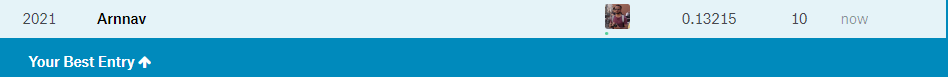

In [60]:
from google.colab import files
from IPython.display import Image
Image('/content/drive/My Drive/DSF/Homework_3/HW3_Kaggle.png',width=800)